## Do all preliminary operations

In [1]:
%matplotlib inline

In [2]:
import os
import json
import matplotlib.pyplot as plt

In [3]:
json_wd = os.path.join(os.getcwd(),'json')
print (json_wd)

C:\Users\ephra\Documents\GitHub\PIDA_Project\json


In [4]:
from os import listdir
from os.path import isfile, join

jsonfiles = [f for f in listdir(json_wd) if isfile(join(json_wd, f))]

In [5]:
print(len(jsonfiles))

3


## Import JSON files

In [6]:
#input all json files and load into list
all_files=[]
for filename in jsonfiles:
    file=open(os.path.join(json_wd, filename))
    data=json.load(file)
    all_files.append(data)
    file.close()
    #data=json.loads(filename)
print (all_files[:1])

[{'Apple': {'core': ['tag1', 'orange'], 'shell': ['teeth', 'again']}}]


## Make all the connections

In [7]:
all_links=[]
dataset_list=[]
for index, file in enumerate(all_files):
    #print (list(file.keys())[0], "is the name of the dataset")
    name=list(file.keys())[0]
    dataset_list.append(name)
    #print (list(file[name].keys()), "are the column names")
    for col in file[name].keys():
        #print ("Under column ", col, "are tags ", file[name][col])
        for tag in file[name][col]:
            #print ("Tag: ", tag)
            for secondindex in range (index+1, len(all_files)):
                secondname=list(all_files[secondindex].keys())[0]
                for secondcol in all_files[secondindex][secondname].keys():
                    #print ("Under second column ", secondcol, "are tags ", all_files[secondindex][secondname][secondcol])
                    for secondtag in all_files[secondindex][secondname][secondcol]:
                        #print ("Tag: ", secondtag)
                        #do all checking for common tags here
                        if tag.upper()==secondtag.upper():
                            print (name, "and", secondname, "are linked at column", col, "and column", secondcol, "through tag", tag)
                            all_links.append([name.upper(), col.upper(), tag.upper() , secondname.upper(), secondcol.upper(), secondtag.upper()])
                        #do all checking for common tags here
print (len(all_links))

Apple and 311 are linked at column core and column test through tag tag1
Apple and Bob are linked at column shell and column ele through tag again
Apple and 311 are linked at column shell and column test1 through tag again
Bob and 311 are linked at column data and column test1 through tag another
Bob and 311 are linked at column ele and column test1 through tag another
Bob and 311 are linked at column ele and column test1 through tag again
6


## Reformat list for easy access

In [8]:
full_tree=[]#make tag most important
for sublist in all_links:
    tag=sublist[2]
    col1=sublist[1]
    col2=sublist[4]
    dataset1=sublist[0]
    dataset2=sublist[3]
    full_tree.append([tag, col1, dataset1, col2, dataset2])
print (full_tree)

[['TAG1', 'CORE', 'APPLE', 'TEST', '311'], ['AGAIN', 'SHELL', 'APPLE', 'ELE', 'BOB'], ['AGAIN', 'SHELL', 'APPLE', 'TEST1', '311'], ['ANOTHER', 'DATA', 'BOB', 'TEST1', '311'], ['ANOTHER', 'ELE', 'BOB', 'TEST1', '311'], ['AGAIN', 'ELE', 'BOB', 'TEST1', '311']]


# Basic Data analysis 

## Number of times each tag appears

In [9]:
tag_dict={}
for sublist in full_tree:
    try:
        tag_dict[sublist[0]]+=1
    except Exception:
        tag_dict[sublist[0]]=1
print (tag_dict)

{'TAG1': 1, 'AGAIN': 3, 'ANOTHER': 2}


<Container object of 3 artists>

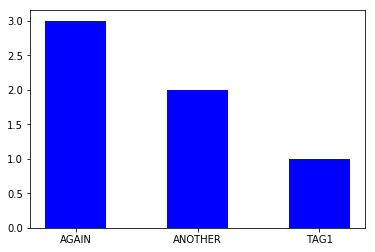

In [10]:
plt.bar(tag_dict.keys(), tag_dict.values(), .5, color='b')

## Number of times each column has associated tags

In [11]:
col_dict={}
for sublist in full_tree:
    try:
        col_dict[sublist[1]]+=1
    except Exception:
        col_dict[sublist[1]]=1
    try:
        col_dict[sublist[3]]+=1
    except Exception:
        col_dict[sublist[3]]=1
print (col_dict)

{'CORE': 1, 'TEST': 1, 'SHELL': 2, 'ELE': 3, 'TEST1': 4, 'DATA': 1}


<Container object of 6 artists>

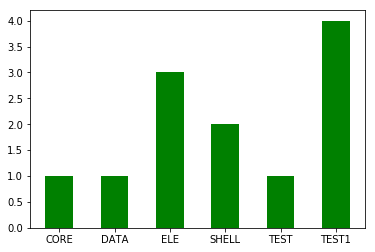

In [12]:
plt.bar(col_dict.keys(), col_dict.values(), .5, color='g')

## Number of links each dataset has

In [13]:
dataset_dict={}
for sublist in full_tree:
    try:
        dataset_dict[sublist[2]]+=1
    except Exception:
        dataset_dict[sublist[2]]=1
    try:
        dataset_dict[sublist[4]]+=1
    except Exception:
        dataset_dict[sublist[4]]=1
print (dataset_dict)

{'APPLE': 3, '311': 5, 'BOB': 4}


<Container object of 3 artists>

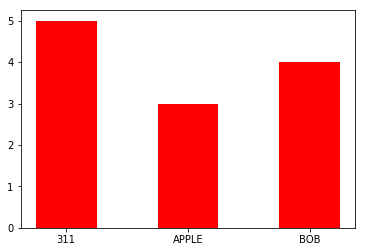

In [14]:
plt.bar(dataset_dict.keys(), dataset_dict.values(), .5, color='r')

In [15]:
full_tree=sorted(full_tree)

In [16]:
from anytree import Node, RenderTree, Resolver
from anytree.search import find
resolver=Resolver('name')
dummy=Node('All_Tags')
for sublist in full_tree:#Tags
    f=find(dummy, lambda node: node.name == sublist[0])
    if f is None:
        n=Node(sublist[0], parent=dummy)
for sublist in full_tree:#Columns
    f=find(dummy, lambda node: node.name == sublist[1])
    if f is None:
        g=find(dummy, lambda node: node.name == sublist[0])
        n=Node(sublist[1], parent=g)   
    f=find(dummy, lambda node: node.name == sublist[3])
    if f is None:
        g=find(dummy, lambda node: node.name == sublist[0])
        n=Node(sublist[3], parent=g) 
o=None
p=None
for sublist in full_tree:#todo fix this part up
    #pass
    f=find(dummy, lambda node: node.name == sublist[2])
    if f is None:
        g=find(dummy, lambda node: node.name == sublist[1])
        n=Node(sublist[2], parent=g)  
    f=find(dummy, lambda node: node.name == sublist[4])
    if f is None:
        g=find(dummy, lambda node: node.name == sublist[3])
        n=Node(sublist[4], parent=g)  
    #f=find(r.get(dummy, sublist[0]), lambda node: node.name == sublist[2])
    #if f is None:
    #    g=find(dummy, lambda node: node.name == sublist[1])
    #    n=Node(sublist[2], parent=g) 
    #g=find(dummy, lambda node: node.name == sublist[3])
    #n=Node(sublist[4], parent=g)
for pre, fill, node in RenderTree(dummy):
    print("%s%s" % (pre, node.name))

All_Tags
├── AGAIN
│   ├── ELE
│   │   └── BOB
│   ├── TEST1
│   │   └── 311
│   └── SHELL
│       └── APPLE
├── ANOTHER
│   └── DATA
└── TAG1
    ├── CORE
    └── TEST
